# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment5 using this file format:</u> <b>Yourfirstname_lastname_Assignment5.ipynb</b> 

#### <b>Deadline</b>: <u>Dec-6-2019 11:59 PM.</u>

### Getting started: Installing Numpy, Keras and TensorFlow

Keras is a high-level Python API that allows you to easily construct, train, and apply neural networks.
However, Keras is not a neural network library itself and depends on one of several neural network backends. We will use the Tensorflow backend. TensorFlow is an open-source library for neural networks (and other mathematical models based on sequences of matrix and tensor computations), originally developed by Google.Also, Keras uses numpy data structures. 

Installing Numpy, TensorFlow and Keras: 

We suggest that you use the Python package management system pip. 
On most systems, the following commands will work:

- $ pip install numpy matplotlib.

- $ pip install tensorflow

- $ pip install keras

### OR Using Anaconda (Easy and Prefered)

- $ conda install keras scikit-learn pandas

Note that this will likely install the CPU version of TensorFlow that does not use the GPU to speed up neural network training. For this assignment, training on the CPU will be sufficient, but if your computer has a GPU (or you want to try running the assignment in the cloud), follow the installation instructions on the tensorflow page. 

If you get stuck during the installation, you can find installation instructions for each package here: 

- Tensorflow: https://www.tensorflow.org/install/ 
- Keras: https://keras.io/#installation 

<b>I highly recommend that </b> you read and run these tutorials before you start this assignment. 
- https://www.tensorflow.org/tutorials/keras/classification
- https://www.tensorflow.org/tutorials/images/cnn


## Part 1
### Introduction
In this assignment you will use the Keras Neural Network API for Python to build neural networks for image classification. 


#### Data Set

We will work on the CIFAR-10 image data set  described here: https://www.cs.toronto.edu/~kriz/cifar.html.

The data set contains 60.000 images labeled with 10 different categories:

Numeric ID	Category Name
- 0	airplane
- 1	automobile
- 2	bird
- 3	cat
- 4	deer
- 5	dog
- 6	frog
- 7	horse
- 8	ship
- 9	truck


Each image is 32x32 pixels large and there are three color channels (red, green blue). Each image can therefore be represented as three 32x32 matrices or one 32x32x3 cube.


In [38]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras import Sequential 
from keras import layers
from keras import optimizers

a. (20 pts) - Loading the CIFAR-10 Data

The following code fragment imports the CIFAR-10 data using Keras. 

In [39]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

In [40]:
print(xtrain.shape)
print(ytrain.shape)

(50000, 32, 32, 3)
(50000, 1)


In [41]:
print(xtest.shape)
print(ytest.shape)

(10000, 32, 32, 3)
(10000, 1)


Split the training data into training and validation (40000 for training, and 10000 for validation). Thus you have xtrain, ytrain, xvalid, yvalid, xtest, and ytest are numpy n-dimension arrays contains the training validation and testing data.

The input training data (xtrain) is a 4-dimensional array containing 40000 images, each of them a 32x32x3 tensor. Numpy arrays can be indexed like nested Python lists, so xtrain[0] will give you the first 32x32x3 image.

The input label (ytrain) is a vector containing the numeric class for each image (see table above for what the numeric IDs mean). For example, xtrain[0] is an image of a frog and therefore ytrain[0] contains the value 6. 

In [42]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain, ytrain, test_size=0.2, random_state=39)

## Visualizing Images
If you want to take a look at the individual images, you can do so using matplotlib (this step is optional). 

array([9], dtype=uint8)

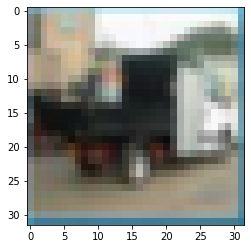

In [43]:
plt.imshow(xtrain[6])
ytrain[6]

b.[20 Pnts] 1-hot representation for class labels

The output layer of the neural networks we will train will contain 10 neurons corresponding to the 10 classes. The classifier predicts the class whose corresponding neuron has the highest activation. We need to convert the numeric indices for each image into a 1-hot vector of length 10, so that the for class label n the n-th element is 1 and all other elements are 0. For example, if the class label is 6, we should get the 1-hot vector [0 0 0 0 0 0 1 0 0 0].
The class labels for the entire training and set should then be represented as a 50000x10 matrix, and the testing data as a 10000x10 matrix (there are 10k test images). 

Write the function load_cifar10(), which should load the cifar-10 data as described above and should return 6 numpy arrays xtrain, ytrain_1hot, xval, yval_1hot, xtest, ytest_1hot. Your function should convert the y arrays into the 1-hot representation. You can either do this using loops (slow), using numpy fancy indexing (see numpy documentation), or by using appropriate functions in the numpy or Keras API. 

Your function should also do the following normalization on the data. The R,G and B values for each pixel range between 0 and 255. Before returning the training data, normalize it so that these value range between 0.0 and 1.0.

In [44]:
from keras.utils import to_categorical
def load_cifar10(xtrain,xval,xtest,ytrain,yval,ytest):
    #normalize
    xtrain = xtrain/255.0
    xval = xval/255.0
    xtest = xtest/255.0
    # one hot encode
    ytrain_1hot = to_categorical(ytrain)
    yval_1hot = to_categorical(yval)
    ytest_1hot = to_categorical(ytest)
    return xtrain, xval, xtest, ytrain_1hot, yval_1hot, ytest_1hot
xtrain,xval,xtest,ytrain_1hot,yval_1hot,ytest_1hot = load_cifar10(xtrain,xvalid,xtest,ytrain,yvalid,ytest)
print(xtrain)

[[[[0.70980392 0.76470588 0.52941176]
   [0.65882353 0.70980392 0.49019608]
   [0.52156863 0.57254902 0.36078431]
   ...
   [0.14117647 0.16470588 0.11372549]
   [0.15294118 0.17647059 0.12941176]
   [0.14509804 0.16862745 0.11372549]]

  [[0.6745098  0.72941176 0.50588235]
   [0.57254902 0.62352941 0.41960784]
   [0.50980392 0.55686275 0.36470588]
   ...
   [0.34117647 0.37647059 0.27058824]
   [0.34901961 0.38039216 0.27843137]
   [0.35686275 0.39215686 0.27843137]]

  [[0.41176471 0.4627451  0.25882353]
   [0.42352941 0.47058824 0.28235294]
   [0.38431373 0.42745098 0.25490196]
   ...
   [0.30980392 0.34117647 0.23529412]
   [0.32941176 0.36470588 0.25882353]
   [0.46666667 0.50196078 0.38431373]]

  ...

  [[0.74509804 0.75294118 0.5254902 ]
   [0.74117647 0.74509804 0.5254902 ]
   [0.69019608 0.69411765 0.46666667]
   ...
   [0.75294118 0.74901961 0.53333333]
   [0.74509804 0.7372549  0.5254902 ]
   [0.78039216 0.77254902 0.55294118]]

  [[0.72941176 0.74117647 0.52941176]
   [0.7

### Check shapes

In [45]:
print(xtrain.shape)
print(ytrain_1hot.shape)

(40000, 32, 32, 3)
(40000, 10)


In [46]:
print(xval.shape)
print(yval_1hot.shape)

(10000, 32, 32, 3)
(10000, 10)


In [47]:
print(xtest.shape)
print(ytest_1hot.shape)

(10000, 32, 32, 3)
(10000, 10)


### Check one-hot encoding

In [48]:
ytrain_1hot[0], yval_1hot[1], ytest_1hot[2]

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32))

c. [20 Pnts]  In this task, you will implement an MLP network using keras.Sequential method with:

- Batch size: 16. 
- Number of hidden layers: 1 (100 neuron).
- use SGD optimizer, Learning Rate: 0.01.
- #of epochs 10.
- Use softmax layer for your output.
- use Relu as your activation function.

Keep all other hyperparameters (activation function, etc.) at their default settings.


Find the performance (accuracy) of your model on the validation set and test set after training for 10 epochs.

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(100),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(xtrain, ytrain_1hot, epochs=10, batch_size=16)

Epoch 1/10
40000/40000 [==============================] - 10s 252us/step - loss: 1.8867 - acc: 0.3208
Epoch 2/10
40000/40000 [==============================] - 7s 183us/step - loss: 1.7109 - acc: 0.3924
Epoch 3/10
40000/40000 [==============================] - 8s 189us/step - loss: 1.6376 - acc: 0.4179 2s - los - ETA: 1s - 
Epoch 4/10
40000/40000 [==============================] - 8s 194us/step - loss: 1.5882 - acc: 0.4370
Epoch 5/10
40000/40000 [==============================] - 8s 194us/step - loss: 1.5503 - acc: 0.4529
Epoch 6/10
40000/40000 [==============================] - 8s 199us/step - loss: 1.5212 - acc: 0.4657
Epoch 7/10
40000/40000 [==============================] - 8s 198us/step - loss: 1.4961 - acc: 0.4724
Epoch 8/10
40000/40000 [==============================] - 9s 213us/step - loss: 1.4724 - acc: 0.4806
Epoch 9/10
40000/40000 [==============================] - 8s 196us/step - loss: 1.4527 - acc: 0.4865
Epoch 10/10
40000/40000 [==============================] - 8s 196us/

10000/10000 [==============================] - 0s 37us/step
Accuracy: 46.13
10000/10000 [==============================] - 0s 32us/step
Accuracy: 46.62


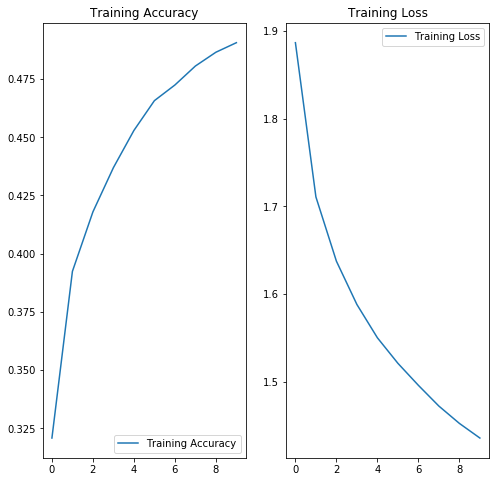

In [52]:
indH, accuracy = model.evaluate(xval, yval_1hot)
print('Accuracy: %.2f' % (accuracy*100))

indH, accuracy = model.evaluate(xtest, ytest_1hot)
print('Accuracy: %.2f' % (accuracy*100))

acc = history.history['acc']
loss = history.history['loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

d. [10 Pnts] How many parameters in the model implemented in b?

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               307300    
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


## 308,310 parameters in the model

e. [10 Pnts] At which epoch your model starts to overfit? Do you think early stopping would be a good solution to avoid overfitting in this case, explain?

In [59]:
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(100),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(xtrain, ytrain_1hot, epochs=8, batch_size=16)
indH, accuracy = model.evaluate(xval, yval_1hot)
print('Accuracy: %.2f' % (accuracy*100))

indH, accuracy = model.evaluate(xtest, ytest_1hot)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/8
40000/40000 [==============================] - 8s 208us/step - loss: 1.8969 - acc: 0.3168 1s - loss: 1.9209 - ETA: 0s - loss: 1.9081 
Epoch 2/8
40000/40000 [==============================] - 8s 194us/step - loss: 1.7155 - acc: 0.3884
Epoch 3/8
40000/40000 [==============================] - 8s 207us/step - loss: 1.6394 - acc: 0.4159
Epoch 4/8
40000/40000 [==============================] - 8s 199us/step - loss: 1.5914 - acc: 0.4363
Epoch 5/8
40000/40000 [==============================] - 8s 198us/step - loss: 1.5528 - acc: 0.4482 0s - loss: 1.5
Epoch 6/8
40000/40000 [==============================] - 8s 195us/step - loss: 1.5231 - acc: 0.4617
Epoch 7/8
40000/40000 [==============================] - 8s 198us/step - loss: 1.5006 - acc: 0.4723
Epoch 8/8
10000/10000 [==============================] - 0s 46us/step
Accuracy: 47.08
10000/10000 [==============================] - 0s 34us/step
Accuracy: 47.30


In [61]:
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(100),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(xtrain, ytrain_1hot, epochs=9, batch_size=16)
indH, accuracy = model.evaluate(xval, yval_1hot)
print('Accuracy: %.2f' % (accuracy*100))

indH, accuracy = model.evaluate(xtest, ytest_1hot)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/9
40000/40000 [==============================] - 9s 228us/step - loss: 1.8923 - acc: 0.3210
Epoch 2/9
40000/40000 [==============================] - 8s 212us/step - loss: 1.7157 - acc: 0.3890
Epoch 3/9
40000/40000 [==============================] - 8s 210us/step - loss: 1.6387 - acc: 0.4192
Epoch 4/9
40000/40000 [==============================] - 9s 218us/step - loss: 1.5898 - acc: 0.4374
Epoch 5/9
40000/40000 [==============================] - 9s 213us/step - loss: 1.5534 - acc: 0.4508
Epoch 6/9
40000/40000 [==============================] - 9s 213us/step - loss: 1.5227 - acc: 0.4580 0s - loss: 1.5275 - ac
Epoch 7/9
40000/40000 [==============================] - 9s 217us/step - loss: 1.4998 - acc: 0.4691
Epoch 8/9
40000/40000 [==============================] - 8s 196us/step - loss: 1.4779 - acc: 0.4776 1s -
Epoch 9/9
10000/10000 [==============================] - 1s 54us/step
Accuracy: 41.72
10000/10000 [==============================] - 0s 35us/step
Accuracy: 42.90


## The model is overfitting after the eigth epoch, seen above where the test and validation accuracy are higher for eight epochs than for nine or ten epochs. In this case early stopping would help. When I decreased the number of epochs, the algorithm performed better on the test dataset. 

f. [40 pts] You must have noticed that one needs to set several parameters—such as the number of hidden layers, the number of neurons in each hidden layer, the non-linearity or activation function to be used, etc. These quantities are known as the hyper-parameters of the network. They need to be specified by the user creating the neural network model.

In this task, you will evaluate the performance of your network for varying values of hyperparameters. Keeping the rest of the values constant (and equal to the default values), adjust the values of parameters as described below. Find the performance (accuracy) of your model on the validation set and plot a trend graph for each of the following.

- Batch size: 32, 64, 128 (default 32).
- Number of hidden layers: 1, 2, 4 (default 2).
- SGD optimizer, Learning Rate: 0.001, 0.01, 0.1, 1 (default 0.01).
- Use 10 epochs for all the experiments.
- activation function Relu for all the experiments.

Use these values to create the most successful model you can (evaluated based on validation scores) and report its accuracy on the test data. Keep all other hyperparameters (number of epochs, activation function, etc.) at their default settings. 

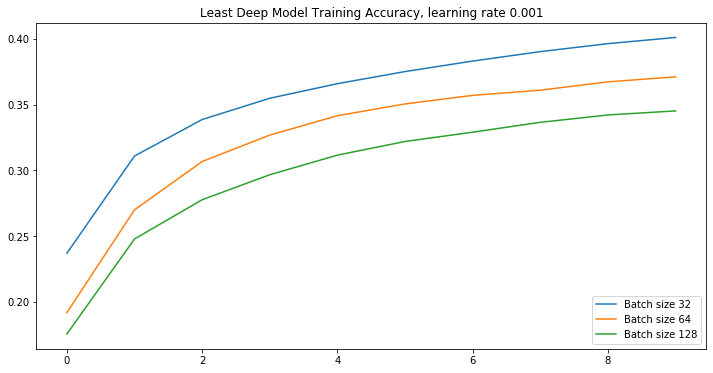

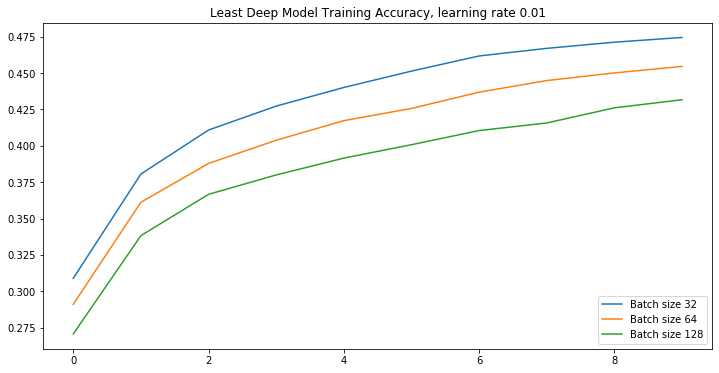

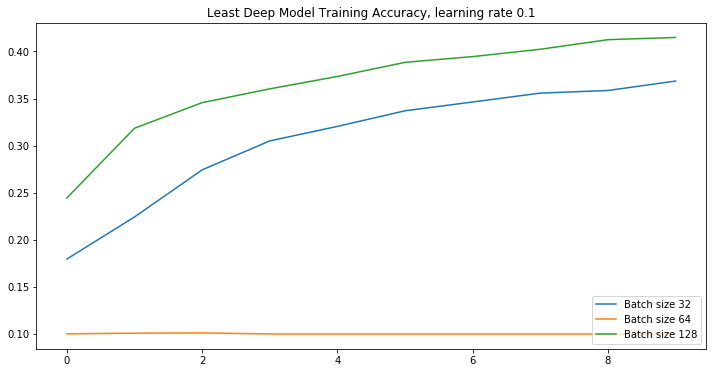

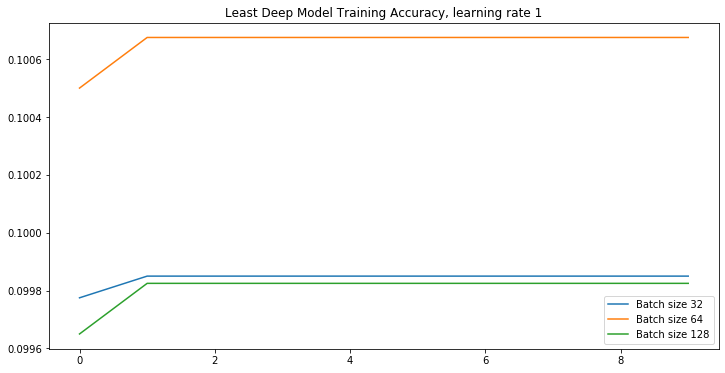

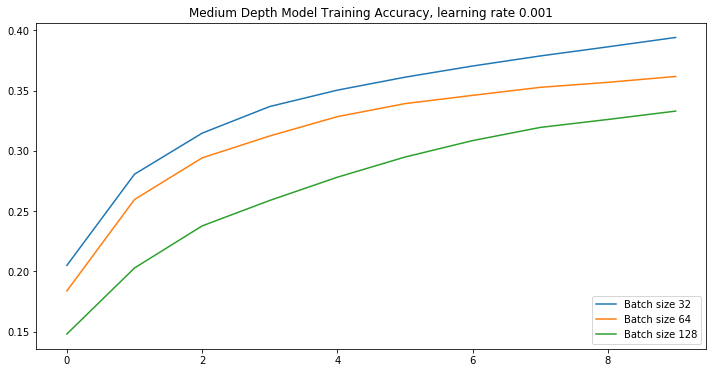

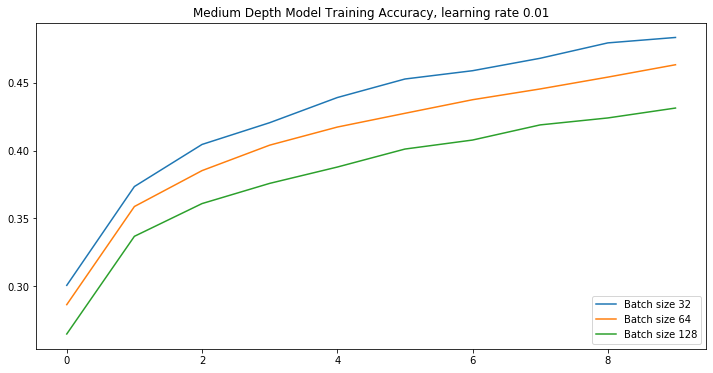

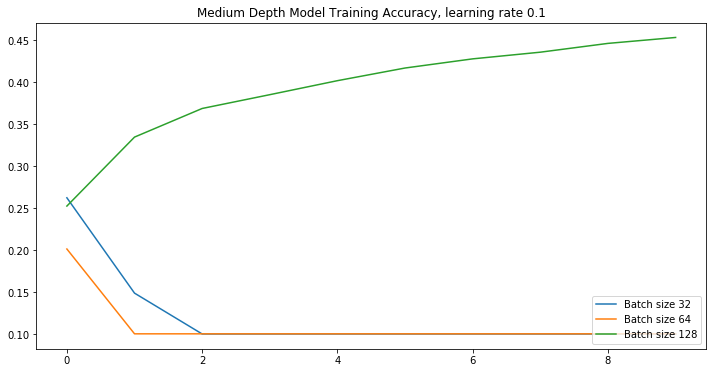

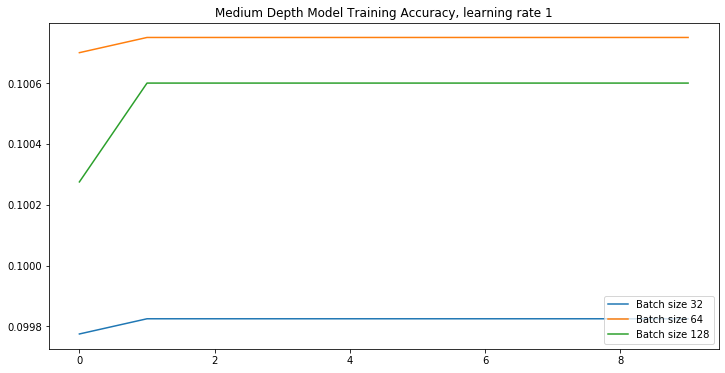

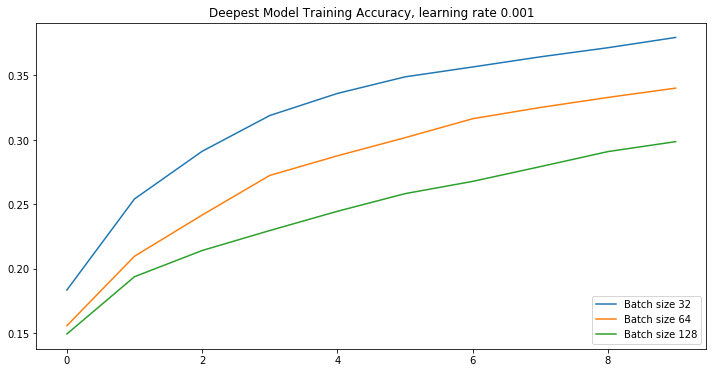

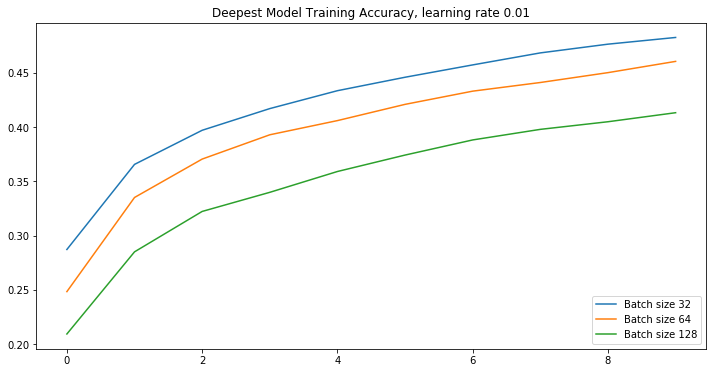

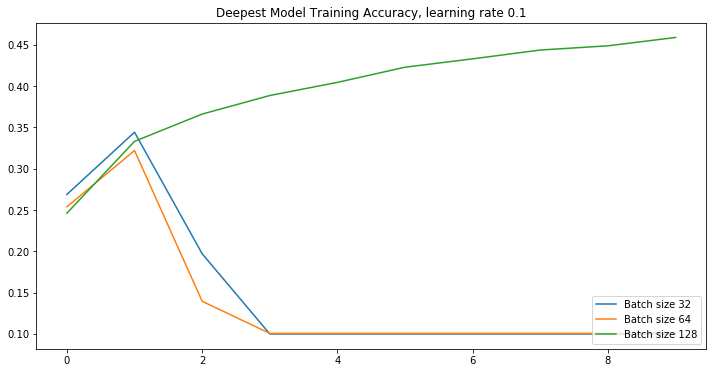

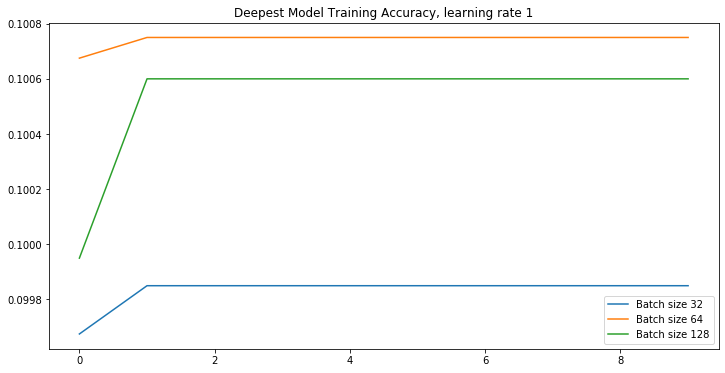

In [46]:
opt1 = SGD(lr=0.001)
opt2 = SGD(lr=0.01)
opt3 = SGD(lr=0.1)
opt4 = SGD(lr=1)
opts = [opt1,opt2,opt3,opt4]


epochs_range = range(10)
models = [model1,model2,model3]
lrs = [0.001,0.01,0.1,1]
modelNames = ["Least Deep Model","Medium Depth Model", "Deepest Model"]
j = 0
for modelN in modelNames:
    i = 0
    for opt in opts:
        plt.figure(figsize=(12, 6))
        for batch in [32,64,128]:
            if modelN == "Least Deep Model":
                model = Sequential([ 
                    Flatten(input_shape=(32,32,3)),
                    Dense(100),
                    Activation('relu'),
                    Dense(10),
                    Activation('softmax'),
                ])
            elif modelN == "Medium Depth Model":
                model = Sequential([
                    Flatten(input_shape=(32,32,3)),
                    Dense(100),
                    Activation('relu'),
                    Dense(100),
                    Activation('relu'),
                    Dense(10),
                    Activation('softmax'),
                ])
            else:
                   model = Sequential([
                        Flatten(input_shape=(32,32,3)),
                        Dense(100),
                        Activation('relu'),
                        Dense(100),
                        Activation('relu'),
                        Dense(100),
                        Activation('relu'),
                        Dense(100),
                        Activation('relu'),
                        Dense(10),
                        Activation('softmax'),
                    ]) 
            model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
            history = model.fit(xtrain, ytrain_1hot, epochs=10, batch_size=batch,verbose = 0)
            acc = history.history['acc']
            plt.plot(epochs_range, acc, label='Batch size ' + str(batch))
        plt.legend(loc='lower right')
        plt.title(modelNames[j] + ' Training Accuracy, learning rate ' +str(lrs[i]))
        i+=1
        plt.show()
    j+=1

## The medium depth neural network with 2 hidden layers performed the best with learning rate 0.01 and batch size 32.

Epoch 1/10
40000/40000 [==============================] - 18s 456us/step - loss: 1.9376 - acc: 0.3034
Epoch 2/10
40000/40000 [==============================] - 12s 310us/step - loss: 1.7575 - acc: 0.3744
Epoch 3/10
40000/40000 [==============================] - 14s 354us/step - loss: 1.6797 - acc: 0.40181s - l
Epoch 4/10
40000/40000 [==============================] - 13s 320us/step - loss: 1.6283 - acc: 0.4205
Epoch 5/10
40000/40000 [==============================] - 12s 308us/step - loss: 1.5885 - acc: 0.4364
Epoch 6/10
40000/40000 [==============================] - 12s 310us/step - loss: 1.5537 - acc: 0.4485
Epoch 7/10
40000/40000 [==============================] - 12s 308us/step - loss: 1.5232 - acc: 0.4608
Epoch 8/10
40000/40000 [==============================] - 12s 308us/step - loss: 1.4923 - acc: 0.4724
Epoch 9/10
40000/40000 [==============================] - 13s 315us/step - loss: 1.4701 - acc: 0.4812
Epoch 10/10
10000/10000 [==============================] - 4s 403us/step
Acc

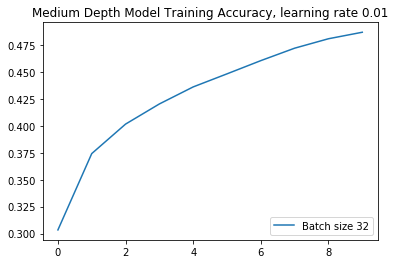

In [49]:
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(100),
    Activation('relu'),
    Dense(100),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.compile(loss='categorical_crossentropy', optimizer=opt2, metrics=['accuracy'])
history = model.fit(xtrain, ytrain_1hot, epochs=10, batch_size=32,verbose = 1)
indH, accuracy = model.evaluate(xtest, ytest_1hot)
print('Accuracy: %.2f' % (accuracy*100))
acc = history.history['acc']
plt.plot(epochs_range, acc, label='Batch size 32')
plt.legend(loc='lower right')
plt.title('Medium Depth Model Training Accuracy, learning rate 0.01')
plt.show()

## Test accuracy: 47.70

## Par2 (This part is for Graduate students only, it is optional for undergraduates with extra cridets )

In this part you are going to train a convolutional neural network on CIFAR-10  dataset from part 1, refer to part1 to use same training, validation and testing datasets splits. 

a. [30 points] Define the model as indicated in the code below. The model is defined as follows:

- An input that is 32x32x3 dimensional vector.
- Reshape the input as 32x32x3 images (it is a dataset with color images)
- A convolutional layer with 32 filters of shape 12x12x3 and a ReLU non-linearity (with stride (2, 2) and no padding)
- A convolutional layer with 64 filters of shape 5x5x32 and a ReLU non-linearity (with stride (1, 2) and padding to maintain size)
- A max_pooling layer of shape 2x2
- A fully connected layer taking all the outputs of the max_pooling layer to 1024 units and ReLU nonlinearity
- A fully connected layer taking 1024 units to 10 no activation function (the softmax non-linearity will be included in the loss function rather than in the model) 
- Use AdamOptimizer 
- use the Accuracy as your metric... Accuray is simply defined as the fraction of data correctly classified
- initially pick the learning rate to be 0.05 (if this learning rate does not work, pick different learning rate) with decay step of 0.95 every 2000 iterations


write the code to train the model written, train for 15 epochs with a  batch size of 128. 




Hint: start from known architecture then modify the code to match the numbers listed above.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_150 (Conv2D)          (None, 11, 11, 32)        13856     
_________________________________________________________________
activation_220 (Activation)  (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 11, 6, 64)         51264     
_________________________________________________________________
activation_221 (Activation)  (None, 11, 6, 64)         0         
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 5, 3, 64)          0         
_________________________________________________________________
flatten_77 (Flatten)         (None, 960)               0         
_________________________________________________________________
dense_152 (Dense)            (None, 1024)              984064    
__________

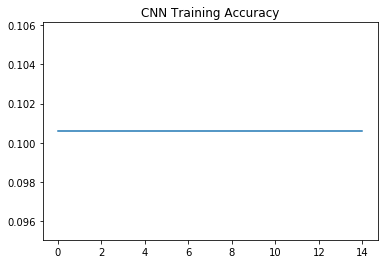

In [123]:
from keras.layers import Reshape,  Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32, (12, 12), input_shape=(32,32,3),strides = (2,2),padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(64, (5, 5),strides = (1,2),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(10))
model.summary()
opt = Adam(lr=.05,decay=.95)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(xtrain, ytrain_1hot, epochs=15, batch_size=128, verbose = 1)
indH, accuracy = model.evaluate(xtest, ytest_1hot)
print('Accuracy: %.2f' % (accuracy*100))
acc = history.history['acc']
epochs_range = range(15)
plt.plot(epochs_range, acc)
plt.title('CNN Training Accuracy')
plt.show()

### I could not properly train the CNN with the architecture provided, despite trying multiple learning rates.

b. [10 points] Find better convolutional neural network architecture that give better results (at least enhancment of 5.0%) than the one built in part a (prove experimentally). 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
activation_161 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 13, 13, 32)        9248      
_________________________________________________________________
activation_162 (Activation)  (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 4, 4, 64)          18496     
__________

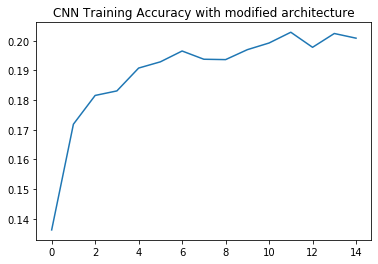

In [104]:
from keras.layers import Reshape,  Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
opt = Adam(lr=.05,decay=.95)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(xtrain, ytrain_1hot, epochs=15, batch_size=128, verbose = 1)
indH, accuracy = model.evaluate(xtest, ytest_1hot)
print('Accuracy: %.2f' % (accuracy*100))
acc = history.history['acc']
epochs_range = range(15)
plt.plot(epochs_range, acc)
plt.title('CNN Training Accuracy with modified architecture')
plt.show()

### With modified architecture I was able to increase the accuracy. Source: https://stackoverflow.com/questions/50079585/cnn-with-keras-accuracy-not-improving